# FeedForward 🥸

In this notebook we explore the possible use of Multilayer Perceptron Neural Network in this classicification task. We used three different architecture strucutures: a baseline Network with two hidden layers and 1100 hidden neurons and then two variations obtained by doubleing the number of neurons or layers.

#### Libriaries

Just import all the usefull libriaries

In [1]:
import utilities as ff
from matplotlib import pyplot as plt
import numpy as np
import pathlib


In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import *
from keras.models import *
from keras.losses import *
from keras.optimizers import *
from keras.utils import *


#### Dataset

Set the parameters.

In [3]:
batch_size=42
img_width, img_height=100,100
color_mode='grayscale'
no_classes = 2
seed=123

Divide the dataset between exemples used for hyperparameters tuning and risk estimation.

In [5]:
train, test = ff.ready_to_be_used_dataset(
    batch_size, image_squared_size=img_width, color_mode=color_mode
)


Found 23401 files belonging to 2 classes.
Using 11701 files for training.
Found 23401 files belonging to 2 classes.
Using 11700 files for validation.


Check the total number of examples.

In [6]:
(len(train)+len(test))*batch_size

23436

Compute the number of batches that must be used for training and validating the model in the hyperparameters tuning.

In [7]:
len(train)*0.8

223.20000000000002

Divede the training part between training and validation.

In [8]:
train,valid=train.take(223),train.skip(223)

Check the dimension of the data.

In [27]:
image_batch, labels_batch = next(iter(valid))
print(f'Size of a batch of images {image_batch.shape}', f'Size of a bath of labels {labels_batch.shape}')


Size of a batch of images (42, 100, 100, 1) Size of a bath of labels (42,)


### Baseline model

#### Model definition

In [34]:
model = Sequential(
    [
        
        Flatten(input_shape=(100, 100, 1)),
        Dense(1000, activation="sigmoid"),
        Dense(100, activation="sigmoid"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 1000)              10001000  
                                                                 
 dense_4 (Dense)             (None, 100)               100100    
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10,101,302
Trainable params: 10,101,302
Non-trainable params: 0
_________________________________________________________________


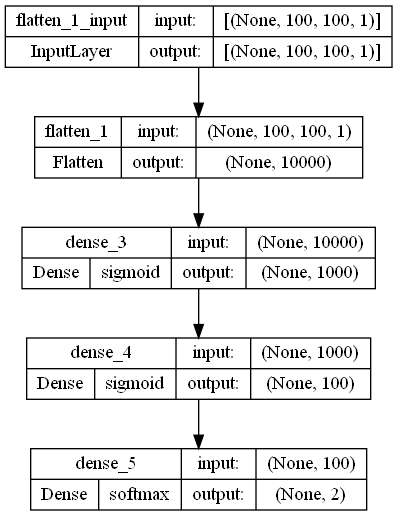

In [35]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [36]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Hyperparameters tuning

In [37]:
history = model.fit(train, validation_data=valid, epochs=20)

Epoch 1/20
223/223 [==============================] - 25s 110ms/step - loss: 0.7368 - accuracy: 0.5050 - val_loss: 0.6987 - val_accuracy: 0.5015
Epoch 2/20
223/223 [==============================] - 26s 117ms/step - loss: 0.6954 - accuracy: 0.4960 - val_loss: 0.6945 - val_accuracy: 0.4989
Epoch 3/20
223/223 [==============================] - 26s 117ms/step - loss: 0.6950 - accuracy: 0.4890 - val_loss: 0.6980 - val_accuracy: 0.5019
Epoch 4/20
223/223 [==============================] - 25s 113ms/step - loss: 0.6947 - accuracy: 0.4984 - val_loss: 0.6970 - val_accuracy: 0.4964
Epoch 5/20
223/223 [==============================] - 24s 107ms/step - loss: 0.6949 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5054
Epoch 6/20
223/223 [==============================] - 24s 109ms/step - loss: 0.6948 - accuracy: 0.4963 - val_loss: 0.6959 - val_accuracy: 0.5036
Epoch 7/20
223/223 [==============================] - 24s 108ms/step - loss: 0.6969 - accuracy: 0.4940 - val_loss: 0.6933 - val_ac

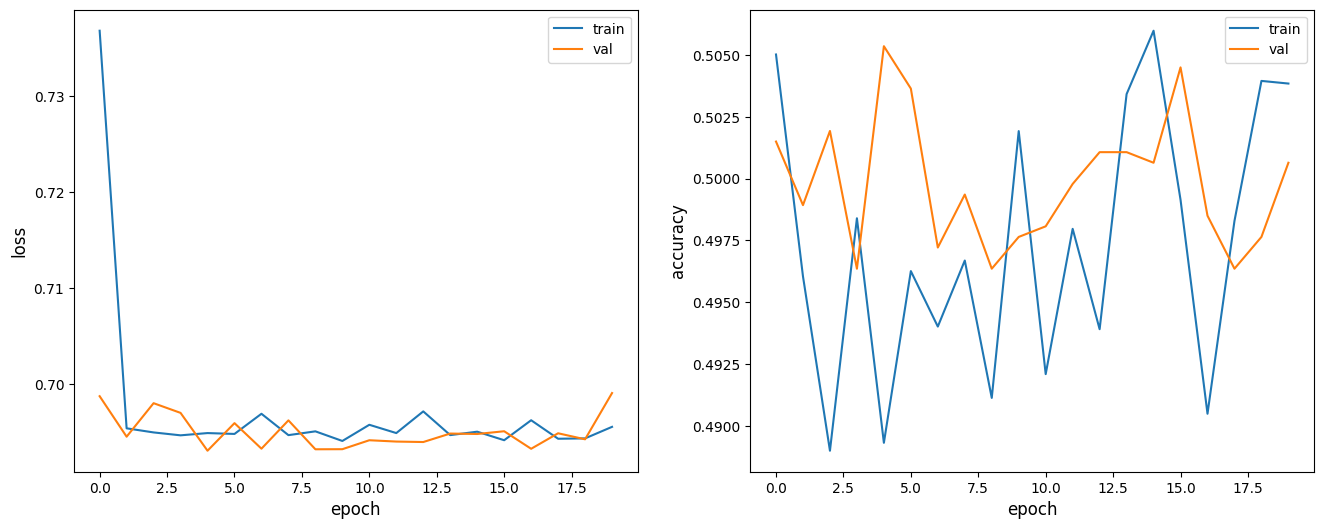

In [38]:
ff.performance_plot(history)

**UNDERFITTING!!** 

Try with another activation function.

In [44]:
model = Sequential(
    [
        
        Flatten(input_shape=(100, 100, 1)),
        Dense(1000, activation="relu"),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [45]:
history = model.fit(train, validation_data=valid, epochs=25)

Epoch 1/25
223/223 [==============================] - 25s 107ms/step - loss: 1.0844 - accuracy: 0.5361 - val_loss: 0.7688 - val_accuracy: 0.5409
Epoch 2/25
223/223 [==============================] - 27s 122ms/step - loss: 0.6968 - accuracy: 0.5650 - val_loss: 0.7234 - val_accuracy: 0.5191
Epoch 3/25
223/223 [==============================] - 26s 117ms/step - loss: 0.6897 - accuracy: 0.5674 - val_loss: 0.6633 - val_accuracy: 0.6094
Epoch 4/25
223/223 [==============================] - 28s 124ms/step - loss: 0.6670 - accuracy: 0.5911 - val_loss: 0.6860 - val_accuracy: 0.5572
Epoch 5/25
223/223 [==============================] - 26s 118ms/step - loss: 0.6633 - accuracy: 0.5993 - val_loss: 0.6585 - val_accuracy: 0.5987
Epoch 6/25
223/223 [==============================] - 26s 118ms/step - loss: 0.6709 - accuracy: 0.5948 - val_loss: 0.7319 - val_accuracy: 0.5041
Epoch 7/25
223/223 [==============================] - 24s 107ms/step - loss: 0.6603 - accuracy: 0.6037 - val_loss: 0.7067 - val_ac

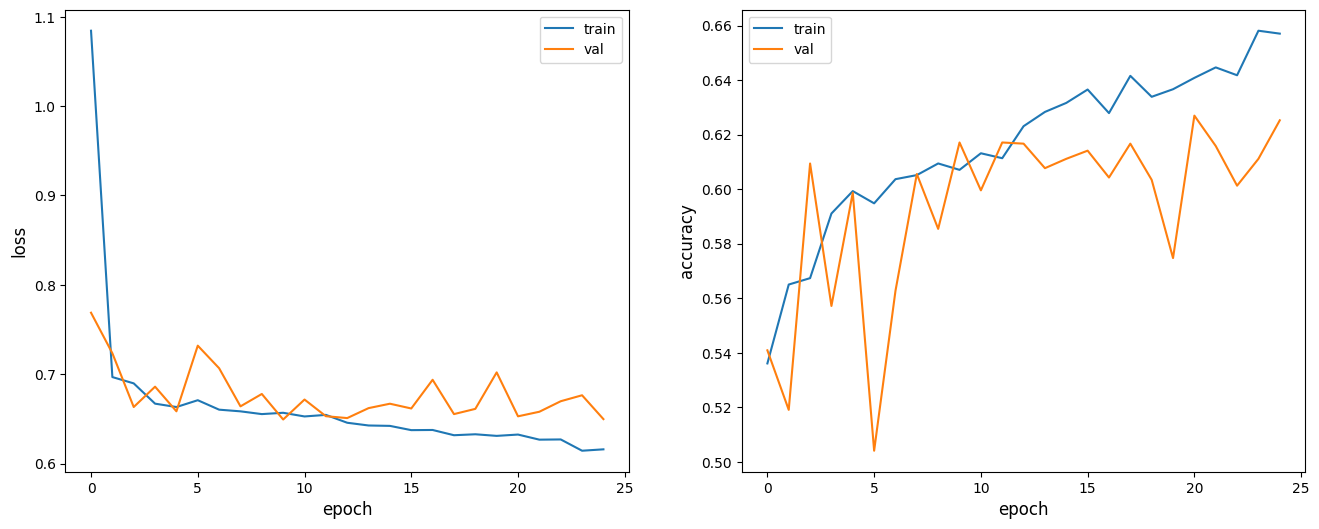

In [46]:
ff.performance_plot(history)

It seems to overfit after the epoch number 11/12.

Let's modify the learning rate to learn faster!

In [54]:
model = Sequential(
    [
        
        Flatten(input_shape=(100, 100, 1)),
        Dense(1000, activation="relu"),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.compile(
    optimizer=Adam(learning_rate=0.002),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [55]:
history = model.fit(train, validation_data=valid, epochs=15)

Epoch 1/15
223/223 [==============================] - 26s 113ms/step - loss: 1.8284 - accuracy: 0.5236 - val_loss: 1.0614 - val_accuracy: 0.5062
Epoch 2/15
223/223 [==============================] - 26s 116ms/step - loss: 0.7263 - accuracy: 0.5541 - val_loss: 0.7018 - val_accuracy: 0.5388
Epoch 3/15
223/223 [==============================] - 25s 111ms/step - loss: 0.6710 - accuracy: 0.5834 - val_loss: 0.7158 - val_accuracy: 0.4968
Epoch 4/15
223/223 [==============================] - 26s 114ms/step - loss: 0.6683 - accuracy: 0.5912 - val_loss: 0.6766 - val_accuracy: 0.5580
Epoch 5/15
223/223 [==============================] - 27s 120ms/step - loss: 0.6670 - accuracy: 0.5943 - val_loss: 0.6541 - val_accuracy: 0.6253
Epoch 6/15
223/223 [==============================] - 26s 116ms/step - loss: 0.6538 - accuracy: 0.6162 - val_loss: 0.6639 - val_accuracy: 0.6116
Epoch 7/15
223/223 [==============================] - 29s 127ms/step - loss: 0.6567 - accuracy: 0.6060 - val_loss: 0.6541 - val_ac

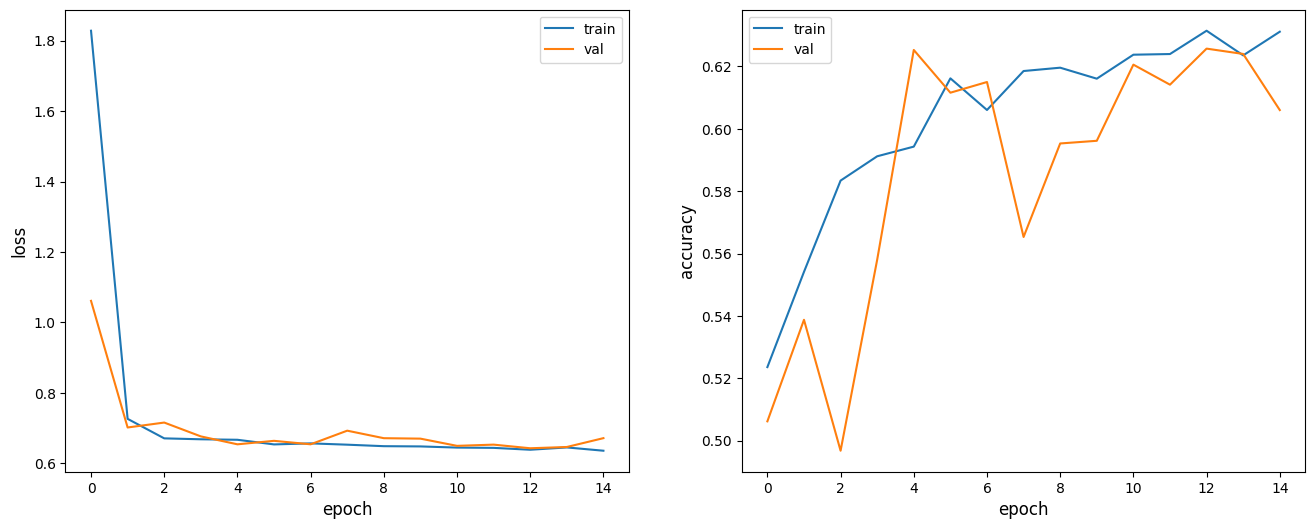

In [56]:
ff.performance_plot(history)

#### Risk estimation

In [10]:
def_model= Sequential(
    [
        
        Flatten(input_shape=(100, 100, 1)),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)

In [11]:
ff.five_fold_cross_validation(def_model,test,no_epochs=5)

------------------------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
268/268 [==============================] - 4s 11ms/step - loss: 1.0002 - accuracy: 0.4328
Epoch 2/5
268/268 [==============================] - 3s 10ms/step - loss: 0.7169 - accuracy: 0.4739
Epoch 3/5
268/268 [==============================] - 2s 9ms/step - loss: 0.6936 - accuracy: 0.4851
Epoch 4/5
268/268 [==============================] - 3s 9ms/step - loss: 0.6937 - accuracy: 0.4813
Epoch 5/5
268/268 [==============================] - 2s 9ms/step - loss: 0.6936 - accuracy: 0.4328
Score for fold 1: loss of 0.6926908493041992; accuracy of 0.49253731966018677
------------------------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
268/268 [==============================] - 4s 11ms/step - loss: 0.7039 - accuracy: 0.4888
Epoch 2/5
268/268 [==============================] - 3s 10ms/step - loss: 0.6937 - accuracy: 0.

### Many neurons model

#### Model definition

In [ ]:
model = tf.keras.Sequential(
    [
        Flatten(input_shape=(100, 100, 3)),
        Dense(2000, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


In [ ]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [ ]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Training

In [ ]:
history = model.fit(train, validation_data=test, epochs=5)


#### Performance evaluation

In [12]:
def_model= Sequential(
    [
        Flatten(input_shape=(100, 100, 1)),
        Dense(2000, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)

In [13]:
ff.five_fold_cross_validation(def_model,test,no_epochs=5)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
89/89 [==============================] - 10s 109ms/step - loss: 19.7079 - accuracy: 0.5393
Epoch 2/5
89/89 [==============================] - 10s 116ms/step - loss: 6.7197 - accuracy: 0.4831
Epoch 3/5
89/89 [==============================] - 10s 111ms/step - loss: 1.5449 - accuracy: 0.6404
Epoch 4/5
89/89 [==============================] - 10s 112ms/step - loss: 0.9779 - accuracy: 0.6854
Epoch 5/5
89/89 [==============================] - 10s 109ms/step - loss: 0.7046 - accuracy: 0.6854
Score for fold 1: loss of 1.0306625366210938; accuracy of 34.78260934352875%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
89/89 [==============================] - 10s 108ms/step - loss: 1.1352 - accuracy: 0.4944
Epoch 2/5
89/89 [==============================] - 11s 122ms/step - loss: 0.7191 - accuracy: 0.5506
Epoch 3/5
89/89 [===========

### Many layers model

#### Model definition

In [ ]:
model = Sequential(
    [
        Flatten(input_shape=(100, 100, 3)),
        Dense(1500, activation="relu"),
        Dense(500, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [ ]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Training

In [ ]:
history = model.fit(train, validation_data=test, epochs=5)


#### Performance evaluation

In [14]:
model = Sequential(
    [
        Flatten(input_shape=(100, 100, 3)),
        Dense(1500, activation="relu"),
        Dense(500, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)


In [15]:
ff.five_fold_cross_validation(def_model,test,no_epochs=5)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
89/89 [==============================] - 10s 105ms/step - loss: 0.8974 - accuracy: 0.5056
Epoch 2/5
89/89 [==============================] - 10s 114ms/step - loss: 0.6983 - accuracy: 0.5843
Epoch 3/5
89/89 [==============================] - 10s 116ms/step - loss: 0.6804 - accuracy: 0.5955
Epoch 4/5
89/89 [==============================] - 10s 108ms/step - loss: 0.6754 - accuracy: 0.5955
Epoch 5/5
89/89 [==============================] - 10s 110ms/step - loss: 0.6661 - accuracy: 0.5843
Score for fold 1: loss of 0.7869862914085388; accuracy of 43.478259444236755%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
89/89 [==============================] - 10s 106ms/step - loss: 0.7608 - accuracy: 0.4831
Epoch 2/5
89/89 [==============================] - 9s 102ms/step - loss: 0.7072 - accuracy: 0.6180
Epoch 3/5
89/89 [============